<img style="float: right;" src=" 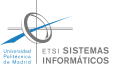" alt="ETSISI logo" /> 


# Ejemplo de implementación de un sistema de control borroso <a id="top"></a>

<i><small>Autores: Alberto Díaz Álvarez y Raul Lara Cabrera<br>Última actualización: 2022-10-30</small></i>

***

## Introducción

Vamos a entender cómo implementar un controlador borroso fácilmente usando la biblioteca `scikit-fuzzy` de Python. Para ello usaremos el ejemplo del péndulo invertido.

## Objetivos

Usaremos el ejemplo del péndulo invertido para crear un controlador borroso que trate de solucionar el problema, es decir, mantener el péndulo en la vértical evitando que caiga al suelo.

## Imports y configuración

A continuación importaremos las librerías que se usarán a lo largo del _notebook_.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Asímismo, configuramos algunos parámetros para adecuar la presentación gráfica.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (16, 9),'figure.dpi': 100})

***

## Descripción del problema

En la versión más básica del péndulo invertido tratamos de mantener este vertical a partir de únicamente el ángulo en el que se encuentra el péndulo, que toma cualquier valor del intervalo $-\pi$ y $\pi$. El carrito se moverá a izquierda o derecha, lo cual representaremos con un valor normalizado en el intervalo $[-1, 1]$.

### Definición de las variables lingüísticas

Las variables lingüísticas se representan con objetos de las clases `Antecedent` o `Consequent`, dependiendo de si se tratan de variables lingüísticas de entrada o de salida.

Estas variables contendrán la información de su dominio de aplicación y de las funciones de pertenencia que caracterizan a sus conjuntos borrosos.

In [3]:
# Antecedente
ángulo = ctrl.Antecedent(np.arange(-np.pi, np.pi, 0.01), 'ángulo')
# Consecuente
motor = ctrl.Consequent(np.arange(-1, 1.1, 0.01), 'motor')

### Definición de las funciones de pertenencia

Las funciones de pertenencia caracterizan a los conjuntos borrosos, que serán los valores que pueden tomar esas variables lingüísticas en mayor o menos medida.

In [4]:
# Funciones de pertenencia de ángulo
ángulo.automf(7)  # dismal, poor, mediocre, average, decent, good, excellent
# Funciones de pertenencia de motor
motor.automf(7)  # Las mismas

Las funciones de pertenencia se pueden especificar de forma explícita, pero esta forma es más rápida para un ejemplo. En caso de querer especificar las funciones de pertenencia explícitamente basta con crearlas de la siguiente manera:

```python
ángulo['mn'] = fuzz.trimf(tip.universe, [-3.14, -2.36, -1.57])
```

Ahora veamos cómo han quedado las variables particionadas:

/home/blazaid/.cache/pypoetry/virtualenvs/notebooks-SJLHqOUc-py3.10/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


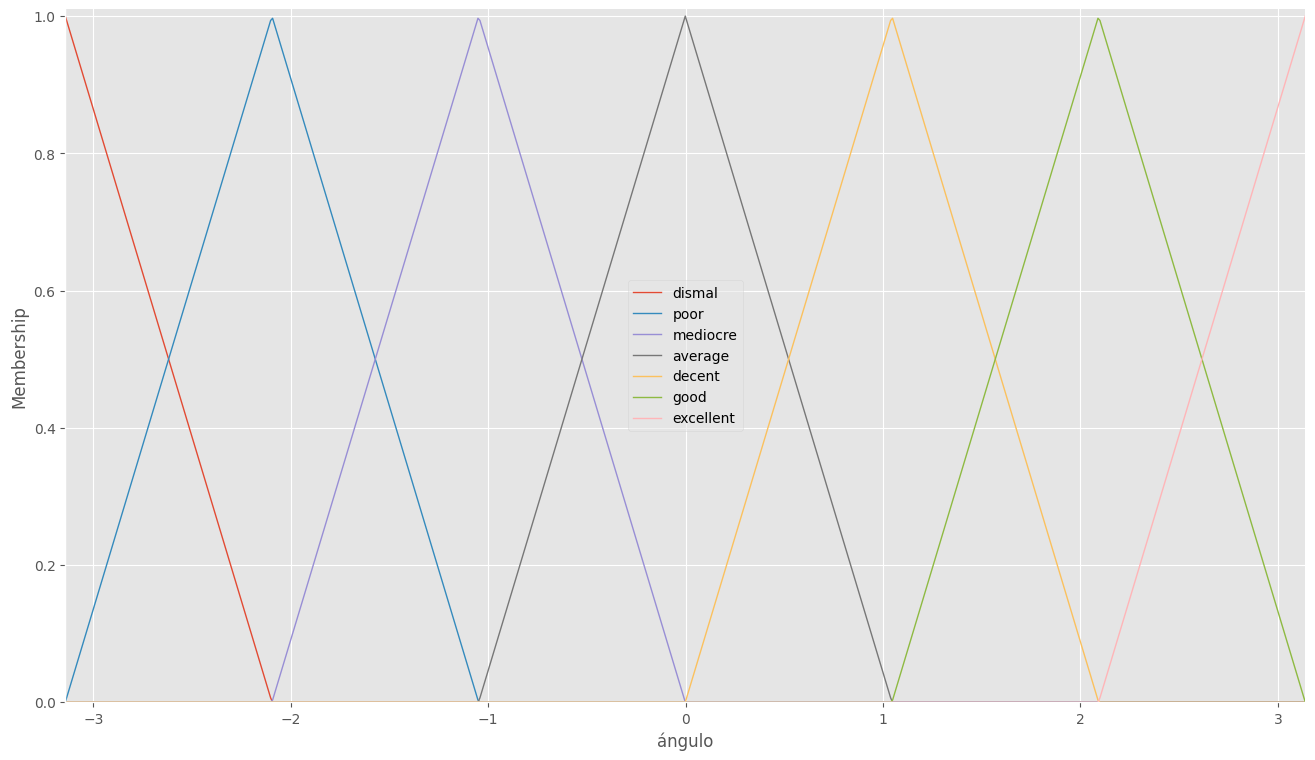

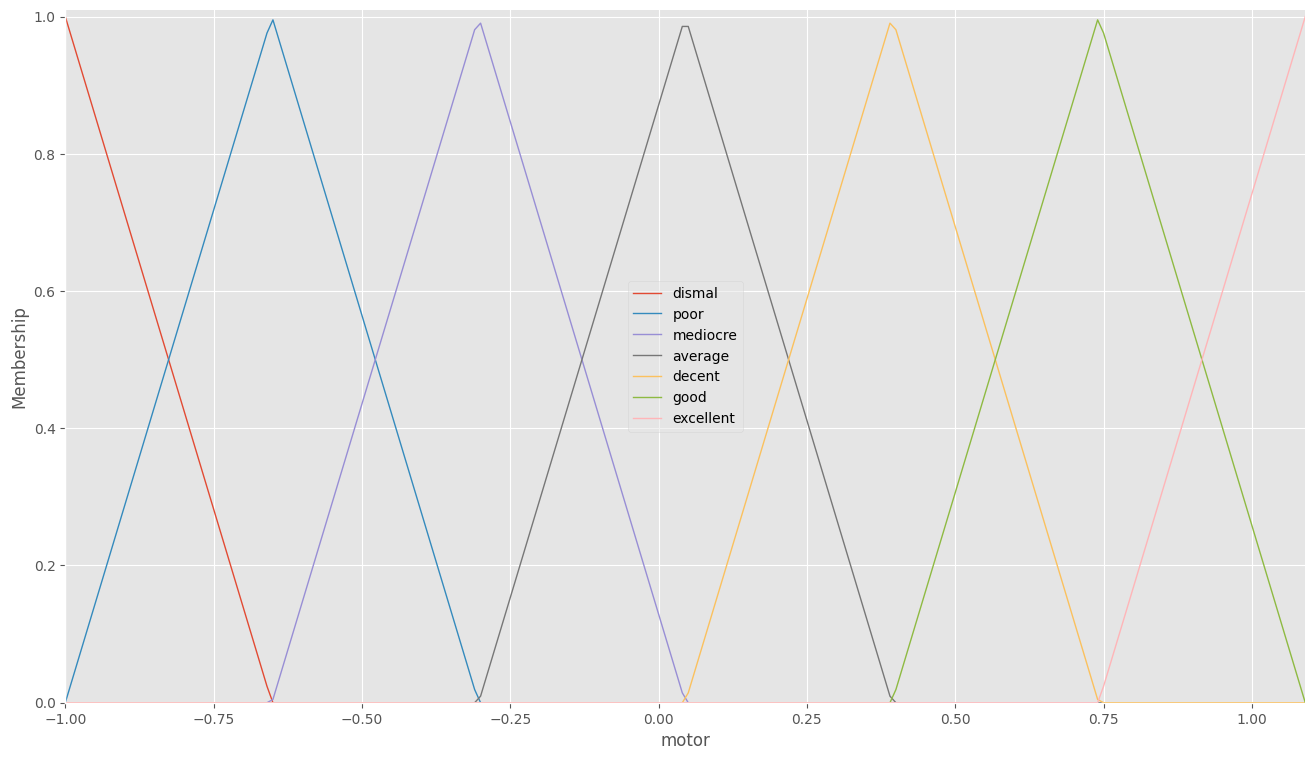

In [5]:
ángulo.view();
motor.view();

### Reglas del controlador

Las reglas en este ejemplo son muy simple: relacionaremos cada ángulo directamente con la velocidad que tiene que tomar el carrito. Así, si está bastante escorado a la derecha, tendrá que aplicar bastante potencia al motor para que se desplace hacia la derecha.

In [6]:
rulebase = [
    ctrl.Rule(ángulo['dismal'], motor['dismal']),
    ctrl.Rule(ángulo['poor'], motor['poor']),
    ctrl.Rule(ángulo['mediocre'], motor['mediocre']),
    ctrl.Rule(ángulo['average'], motor['average']),
    ctrl.Rule(ángulo['decent'], motor['decent']),
    ctrl.Rule(ángulo['good'], motor['good']),
    ctrl.Rule(ángulo['excellent'], motor['excellent']),
]

Evidentemente, si dispusiésemos de más información de entrada, podríamos hacer un controlador más preciso y eficiente. Pero lo importante es que las reglas tienen sentido. Cualquiera que las oyese por primera vez las entendería y probablemente estuviese más o menos de acuerdo, pero son bastante imprecisas. Es en la imprecisión y la ambigüedad donde destaca la lógica borrosa.

### Construcción del simulador y lanzamiento de la simulación

In [7]:
péndulo_ctrl = ctrl.ControlSystem(rulebase)
sim = ctrl.ControlSystemSimulation(péndulo_ctrl)

Con el simulador una vez creado, podemos alimentarle con valores para ver cuál sería la salida de nuestro controlador:

In [8]:
sim.input['ángulo'] = -np.pi/4
sim.compute()
print(sim.output['motor'])

-0.20209582421313999


Podemos además ver cual es la región activada en las variables de salida en función de las entradas (y las reglas activadas).

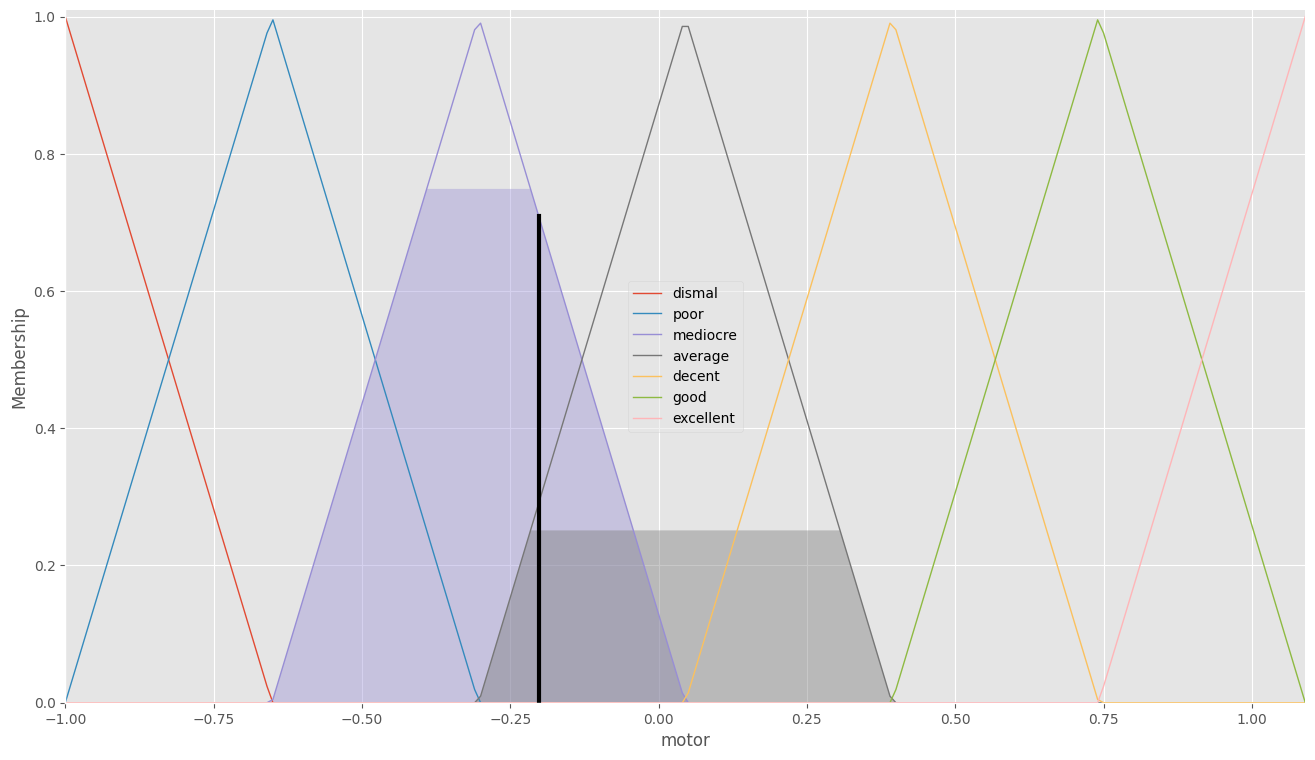

In [9]:
motor.view(sim=sim)

## Resumiendo

Hemos visto la implementación de un controlador basado en lógica borrosa muy sencillo. Evidentemente, mayor complejidad requerirá conocer mejor la librería. Por ello, nunca está de más visitar su [documentación oficial](https://pythonhosted.org/scikit-fuzzy/) (https://pythonhosted.org/scikit-fuzzy/).

***

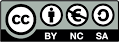

[Volver al inicio](#top)